**KELOMPOK 4**

1. Aufatir Diaul Haq	(23031554127)
2. Andrian Simanjuntak	(3031554146)
3. Darren Eduardo Manuel (23031554187)


1. Lakukan visualisasi data dan preprocessing data (data cleaning, data reduction dan transformation) pada dataset https://archive.ics.uci.edu/dataset/880/support2
2. Berikan alasan dan penjelasan di setiap langkah
3. Lakukan klasifikasi dengan menggunakan KNN (hyperparameter default) pada target death

### Load Dataset

In [18]:
!pip install ucimlrepo

In [19]:
from ucimlrepo import fetch_ucirepo

support2 = fetch_ucirepo(id=880)

X = support2.data.features
y = support2.data.targets

print(support2.metadata)
print(support2.variables)


{'uci_id': 880, 'name': 'SUPPORT2', 'repository_url': 'https://archive.ics.uci.edu/dataset/880/support2', 'data_url': 'https://archive.ics.uci.edu/static/public/880/data.csv', 'abstract': "This dataset comprises 9105 individual critically ill patients across 5 United States medical centers, accessioned throughout 1989-1991 and 1992-1994.\nEach row concerns hospitalized patient records who met the inclusion and exclusion criteria for nine disease categories: acute respiratory failure, chronic obstructive pulmonary disease, congestive heart failure, liver disease, coma, colon cancer, lung cancer, multiple organ system failure with malignancy, and multiple organ system failure with sepsis. The goal is to determine these patients' 2- and 6-month survival rates based on several physiologic, demographics, and disease severity information. \nIt is an important problem because it addresses the growing national concern over patients' loss of control near the end of life. It enables earlier deci

In [50]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler,StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.decomposition import PCA

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo


support2 = fetch_ucirepo(id=880)

X = support2.data.features
y = support2.data.targets

df = pd.concat([X, y], axis=1)
df.head()

,age,sex,dzgroup,dzclass,num.co,edu,income,scoma,charges,totcst,...,ph,glucose,bun,urine,adlp,adls,adlsc,death,hospdead,sfdm2
0,62.84998,male,Lung Cancer,Cancer,0,11.0,$11-$25k,0.0,9715.0,NaN,...,7.459961,NaN,NaN,NaN,7.0,7.0,7.0,0,0,NaN
1,60.33899,female,Cirrhosis,COPD/CHF/Cirrhosis,2,12.0,$11-$25k,44.0,34496.0,NaN,...,7.250000,NaN,NaN,NaN,NaN,1.0,1.0,1,1,<2 mo. follow-up
2,52.74698,female,Cirrhosis,COPD/CHF/Cirrhosis,2,12.0,under $11k,0.0,41094.0,NaN,...,7.459961,NaN,NaN,NaN,1.0,0.0,0.0,1,0,<2 mo. follow-up
3,42.38498,female,Lung Cancer,Cancer,2,11.0,under $11k,0.0,3075.0,NaN,...,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1,0,no(M2 and SIP pres)
4,79.88495,female,ARF/MOSF w/Sepsis,ARF/MOSF,1,NaN,NaN,26.0,50127.0,NaN,...,7.509766,NaN,NaN,NaN,NaN,2.0,2.0,0,0,no(M2 and SIP pres)


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9105 entries, 0 to 9104
Data columns (total 45 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       9105 non-null   float64
 1   sex       9105 non-null   object 
 2   dzgroup   9105 non-null   object 
 3   dzclass   9105 non-null   object 
 4   num.co    9105 non-null   int64  
 5   edu       7471 non-null   float64
 6   income    6123 non-null   object 
 7   scoma     9104 non-null   float64
 8   charges   8933 non-null   float64
 9   totcst    8217 non-null   float64
 10  totmcst   5630 non-null   float64
 11  avtisst   9023 non-null   float64
 12  race      9063 non-null   object 
 13  sps       9104 non-null   float64
 14  aps       9104 non-null   float64
 15  surv2m    9104 non-null   float64
 16  surv6m    9104 non-null   float64
 17  hday      9105 non-null   int64  
 18  diabetes  9105 non-null   int64  
 19  dementia  9105 non-null   int64  
 20  ca        9105 non-null   obje

In [23]:
df.describe()

,age,num.co,edu,scoma,charges,totcst,totmcst,avtisst,sps,aps,...,sod,ph,glucose,bun,urine,adlp,adls,adlsc,death,hospdead
count,9105.000000,9105.000000,7471.000000,9104.000000,8.933000e+03,8217.000000,5630.000000,9023.000000,9104.000000,9104.000000,...,9104.000000,6821.000000,4605.000000,4753.000000,4243.000000,3464.000000,6238.000000,9105.000000,9105.000000,9105.000000
mean,62.650823,1.868644,11.747691,12.058546,5.999579e+04,30825.867768,28828.877838,22.610928,25.525872,37.597979,...,137.568541,7.415364,159.873398,32.349463,2191.546047,1.157910,1.637384,1.888272,0.681054,0.259198
std,15.593710,1.344409,3.447743,24.636694,1.026488e+05,45780.820986,43604.261932,13.233248,9.899377,19.903852,...,6.029326,0.080563,88.391541,26.792288,1455.245777,1.739672,2.231358,2.003763,0.466094,0.438219
min,18.041990,0.000000,0.000000,0.000000,1.169000e+03,0.000000,-102.719970,1.000000,0.199982,0.000000,...,110.000000,6.829102,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,52.797000,1.000000,10.000000,0.000000,9.740000e+03,5929.566400,5177.404300,12.000000,19.000000,23.000000,...,134.000000,7.379883,103.000000,14.000000,1165.500000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,64.856990,2.000000,12.000000,0.000000,2.502400e+04,14452.734400,13223.500000,19.500000,23.898438,34.000000,...,137.000000,7.419922,135.000000,23.000000,1968.000000,0.000000,1.000000,1.000000,1.000000,0.000000
75%,73.998960,3.000000,14.000000,9.000000,6.459800e+04,36087.937500,34223.601600,31.666656,30.199219,49.000000,...,141.000000,7.469727,188.000000,42.000000,3000.000000,2.000000,3.000000,3.000000,1.000000,1.000000
max,101.847960,9.000000,31.000000,100.000000,1.435423e+06,633212.000000,710682.000000,83.000000,99.187500,143.000000,...,181.000000,7.769531,1092.000000,300.000000,9000.000000,7.000000,7.000000,7.073242,1.000000,1.000000


In [24]:
print(f" duplikat = {df.duplicated().sum()}")

 duplikat = 0


In [25]:
cols = ['sex', 'dzgroup', 'dzclass', 'income', 'race', 'ca', 'dnr' ]
df[cols] = df[cols].astype('category')

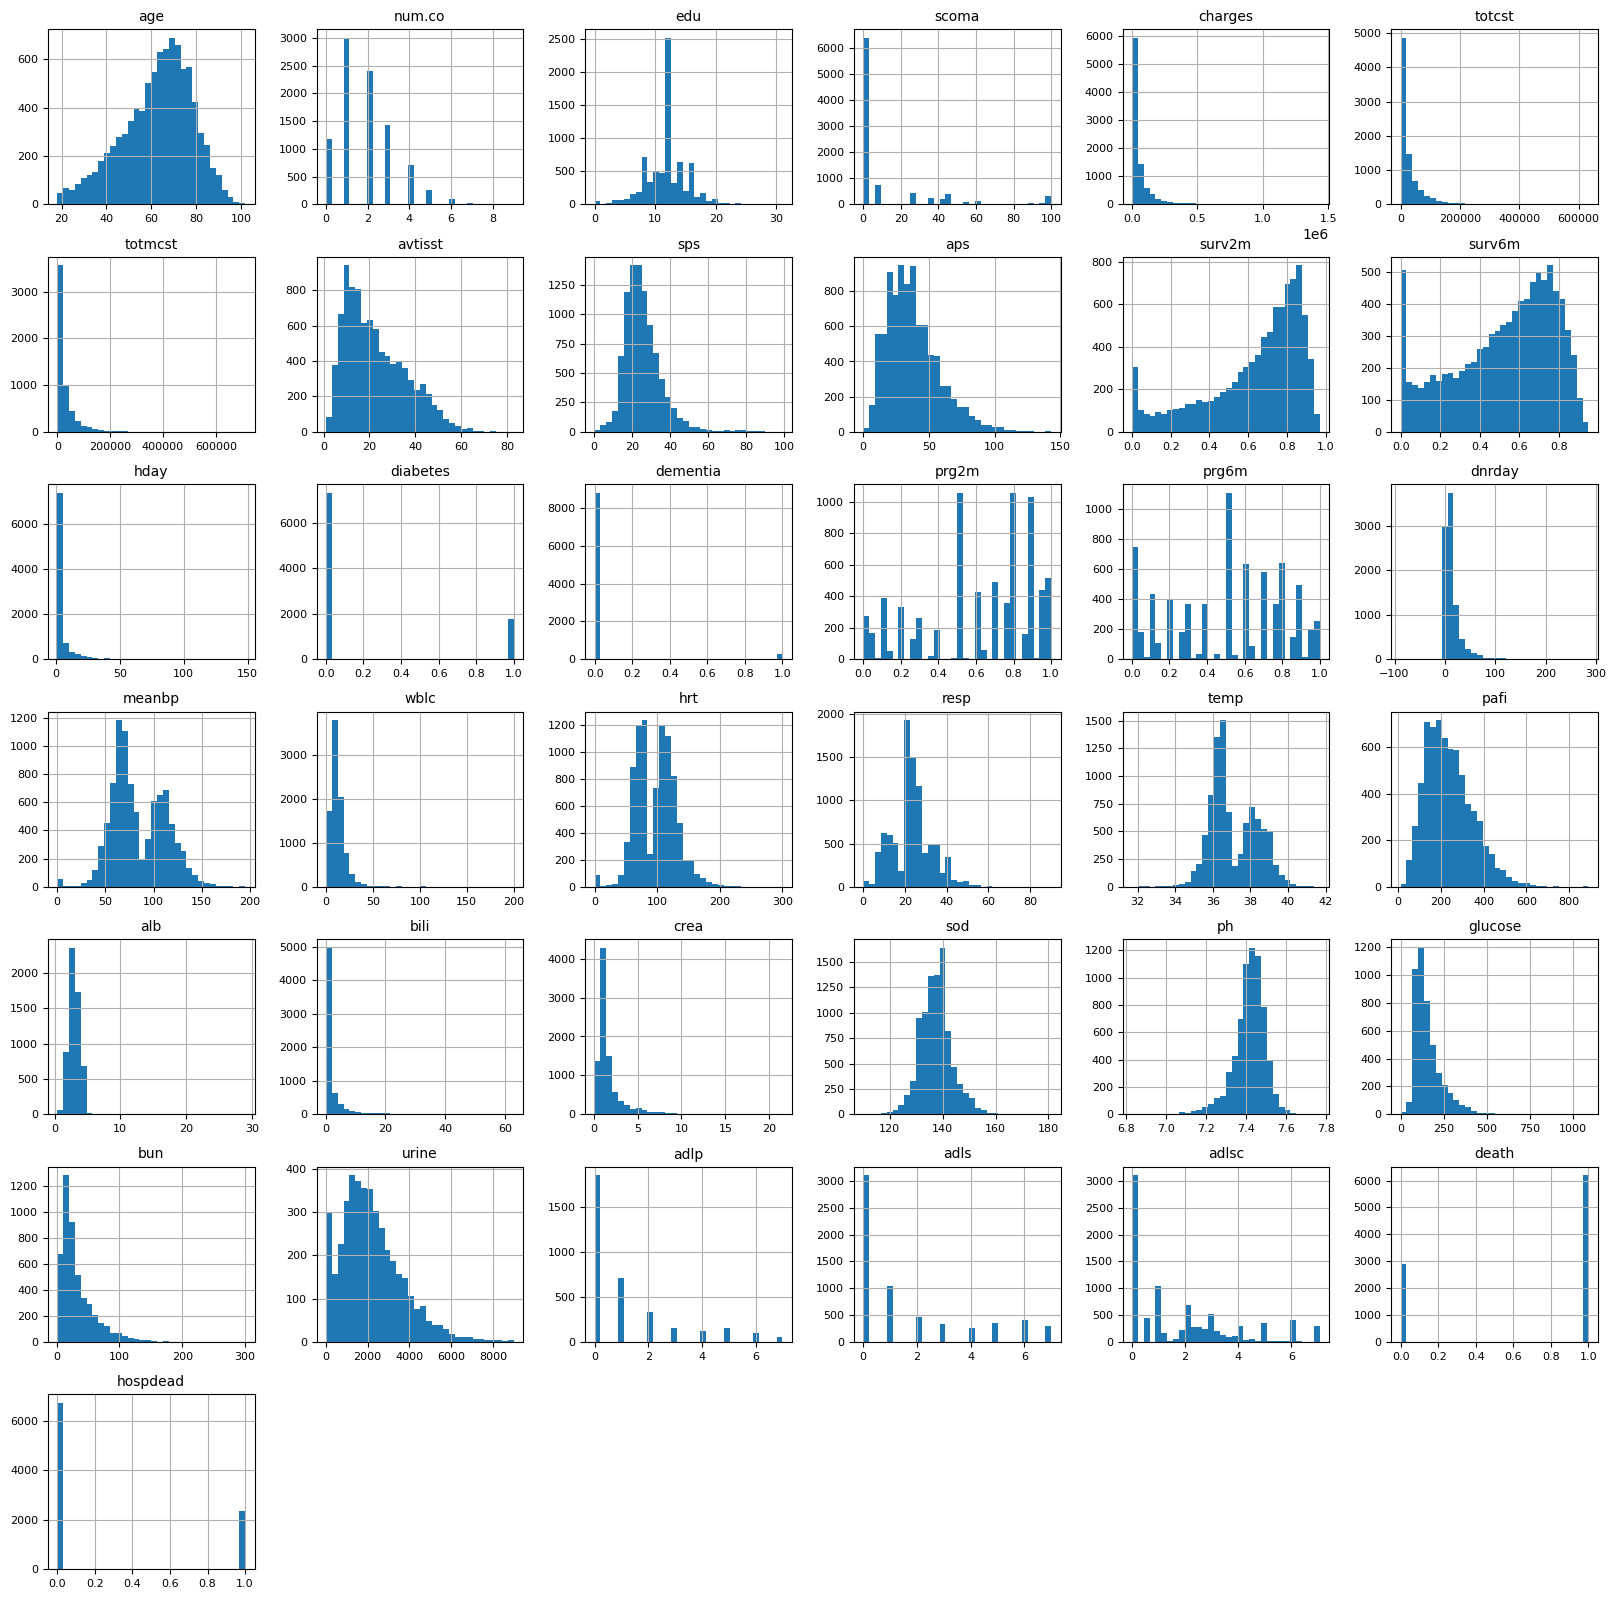

In [27]:
fig = df.hist(figsize=(20, 20), bins=32)

for ax in fig.flatten():
    if ax is not None:
        ax.set_title(ax.get_title(), fontsize=10)
        ax.tick_params(axis='both', labelsize=8)

plt.show()

### Visualisasi missing values

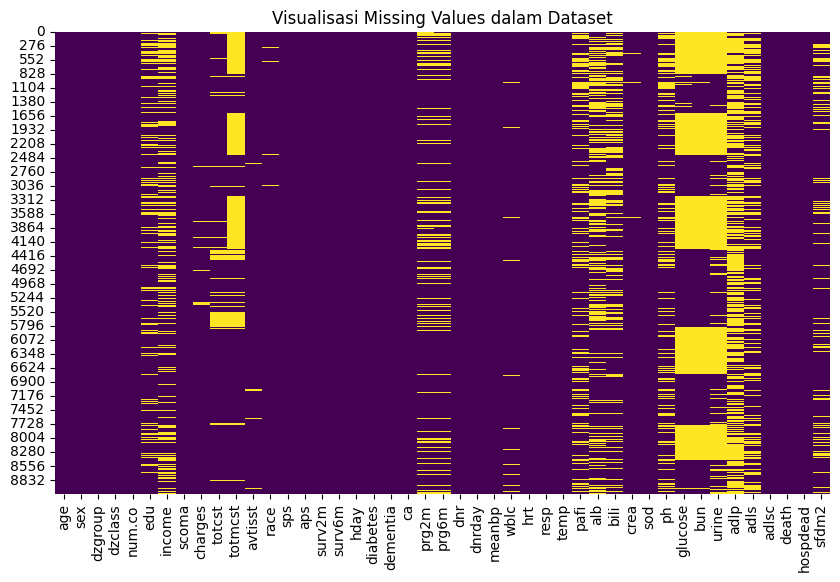

In [31]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Visualisasi Missing Values dalam Dataset")
plt.show()

In [32]:
for col in df.columns:
    unique_count = df[col].nunique()
    missing_count = df[col].isna().sum()
    print(f"Kolom: {col} -> Jumlah unik: {unique_count} -> Missing: {missing_count} -> type{df[col].dtype}")

Kolom: age -> Jumlah unik: 7323 -> Missing: 0 -> typefloat64
Kolom: sex -> Jumlah unik: 2 -> Missing: 0 -> typecategory
Kolom: dzgroup -> Jumlah unik: 8 -> Missing: 0 -> typecategory
Kolom: dzclass -> Jumlah unik: 4 -> Missing: 0 -> typecategory
Kolom: num.co -> Jumlah unik: 10 -> Missing: 0 -> typeint64
Kolom: edu -> Jumlah unik: 31 -> Missing: 1634 -> typefloat64
Kolom: income -> Jumlah unik: 4 -> Missing: 2982 -> typecategory
Kolom: scoma -> Jumlah unik: 11 -> Missing: 1 -> typefloat64
Kolom: charges -> Jumlah unik: 8501 -> Missing: 172 -> typefloat64
Kolom: totcst -> Jumlah unik: 8197 -> Missing: 888 -> typefloat64
Kolom: totmcst -> Jumlah unik: 5516 -> Missing: 3475 -> typefloat64
Kolom: avtisst -> Jumlah unik: 352 -> Missing: 82 -> typefloat64
Kolom: race -> Jumlah unik: 5 -> Missing: 42 -> typecategory
Kolom: sps -> Jumlah unik: 604 -> Missing: 1 -> typefloat64
Kolom: aps -> Jumlah unik: 125 -> Missing: 1 -> typefloat64
Kolom: surv2m -> Jumlah unik: 949 -> Missing: 1 -> typefloa

In [33]:
missing_percentage = (df.isnull().sum() / len(df)) * 100
missing_percentage = missing_percentage[missing_percentage > 0]
missing_percentage

,0
edu,17.946183
income,32.751236
scoma,0.010983
charges,1.889072
totcst,9.752883
totmcst,38.165843
avtisst,0.900604
race,0.461285
sps,0.010983
aps,0.010983


Skewness

           Feature  Skewness
hday          hday  5.849369
dementia  dementia  5.271977
alb            alb  4.893112
bili          bili  4.816193
charges    charges  4.686357
totmcst    totmcst  4.362537
dnrday      dnrday  4.268530
wblc          wblc  4.260110
totcst      totcst  3.954508
crea          crea  3.224557
glucose    glucose  2.577124
scoma        scoma  2.333201
bun            bun  1.879788
adlp          adlp  1.692486
sps            sps  1.604397
diabetes  diabetes  1.537396
adls          adls  1.201348
hospdead  hospdead  1.099063
urine        urine  0.971676
aps            aps  0.944830
adlsc        adlsc  0.937561
pafi          pafi  0.835427
num.co      num.co  0.823158
avtisst    avtisst  0.766217
resp          resp  0.483701
sod            sod  0.357334
temp          temp  0.313134
meanbp      meanbp  0.255017
hrt            hrt  0.205944
edu            edu -0.058256
prg6m        prg6m -0.199869
age            age -0.502034
surv6m      surv6m -0.550193
prg2m        p

<ipython-input-34-28948aaa246f>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=skew_df['Feature'], y=skew_df['Skewness'], palette='coolwarm')


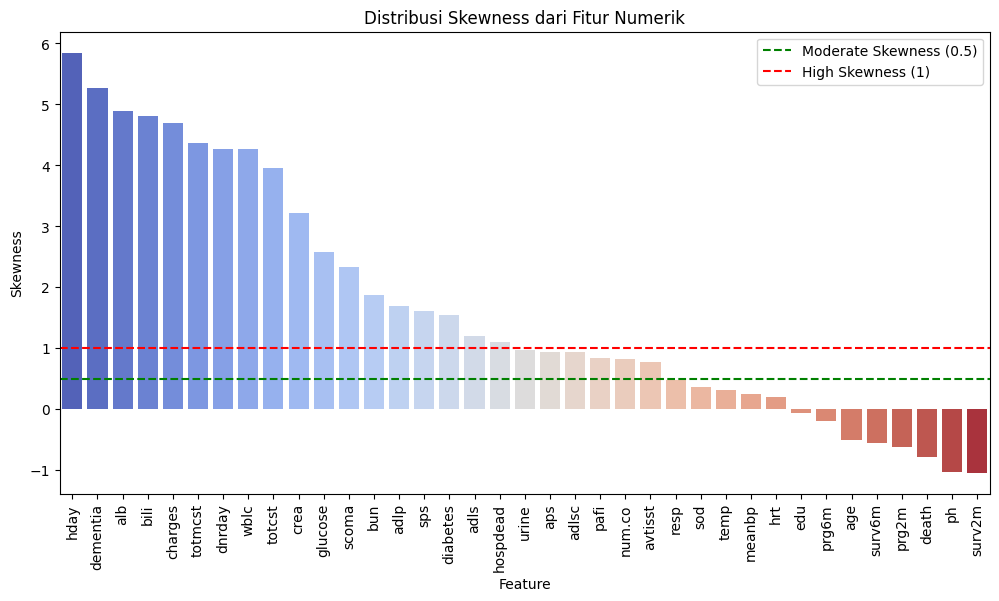

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew

num_cols = df.select_dtypes(include=['float64', 'int64']).columns

skew_values = df[num_cols].apply(lambda x: skew(x.dropna()))

skew_df = pd.DataFrame({'Feature': num_cols, 'Skewness': skew_values})
skew_df = skew_df.sort_values(by='Skewness', ascending=False)

print(skew_df)

plt.figure(figsize=(12, 6))
sns.barplot(x=skew_df['Feature'], y=skew_df['Skewness'], palette='coolwarm')
plt.axhline(0.5, color='green', linestyle='--', label='Moderate Skewness (0.5)')
plt.axhline(1, color='red', linestyle='--', label='High Skewness (1)')
plt.xticks(rotation=90)
plt.xlabel("Feature")
plt.ylabel("Skewness")
plt.title("Distribusi Skewness dari Fitur Numerik")
plt.legend()
plt.show()

### Visualisasi distribusi target 'death'

<ipython-input-35-7aa7c5bb1ae8>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['death'], palette="coolwarm")


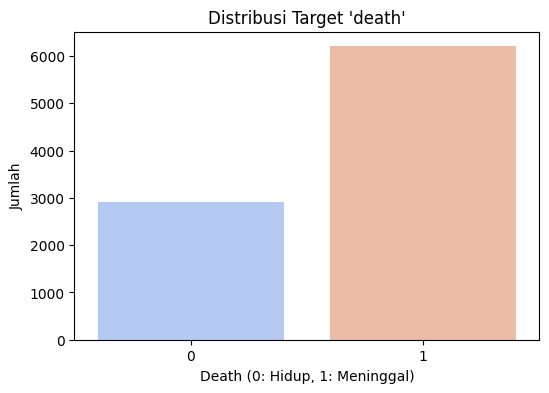

In [35]:
plt.figure(figsize=(6, 4))
sns.countplot(x=df['death'], palette="coolwarm")
plt.title("Distribusi Target 'death'")
plt.xlabel("Death (0: Hidup, 1: Meninggal)")
plt.ylabel("Jumlah")
plt.show()

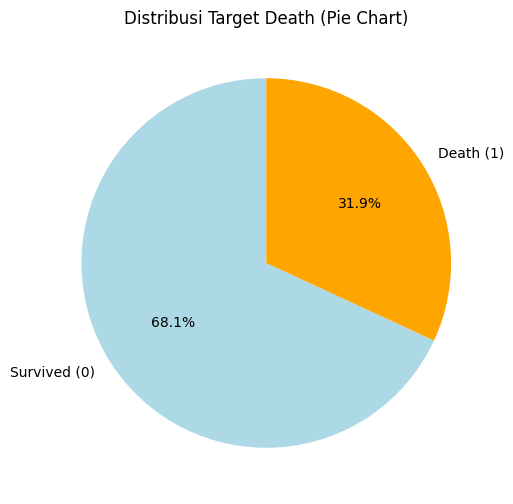

In [36]:
plt.figure(figsize=(8, 6))
df['death'].value_counts().plot.pie(autopct='%1.1f%%', colors=['lightblue', 'orange'], labels=['Survived (0)', 'Death (1)'], startangle=90)
plt.title('Distribusi Target Death (Pie Chart)')
plt.ylabel('')
plt.show()

## Pre-processing

### Handling Misiing Value

In [37]:
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
for col in num_cols:
    if df[col].skew() < 0.5:  # Normal distribution
        df[col] = df[col].fillna(df[col].mean())
    else:  # Skewed distribution
        df[col] = df[col].fillna(df[col].median())

cat_cols = df.select_dtypes(include=['object']).columns
df[cat_cols] = df[cat_cols].apply(lambda x: x.fillna(x.mode()[0]))

### Visualisasi missing values setelah handling

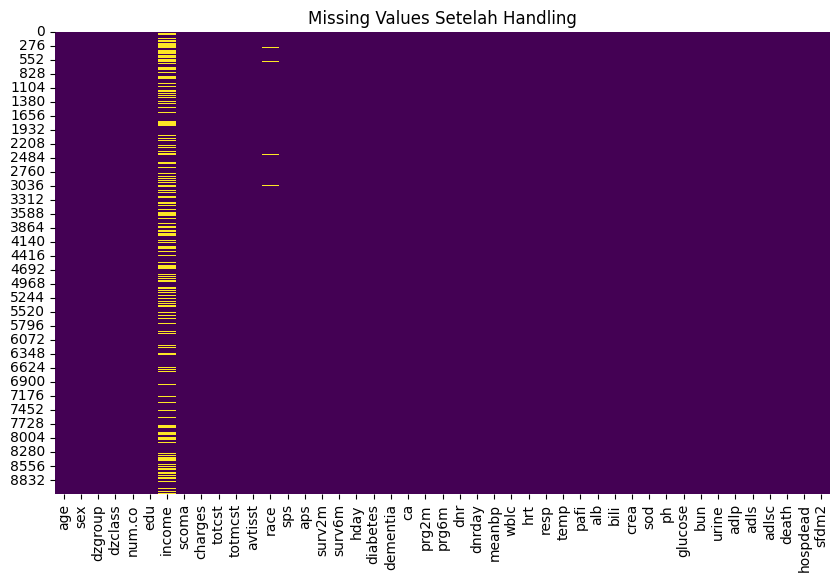

In [38]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Setelah Handling")
plt.show()

### Visualisasi distribusi fitur numerik setelah handling missing values

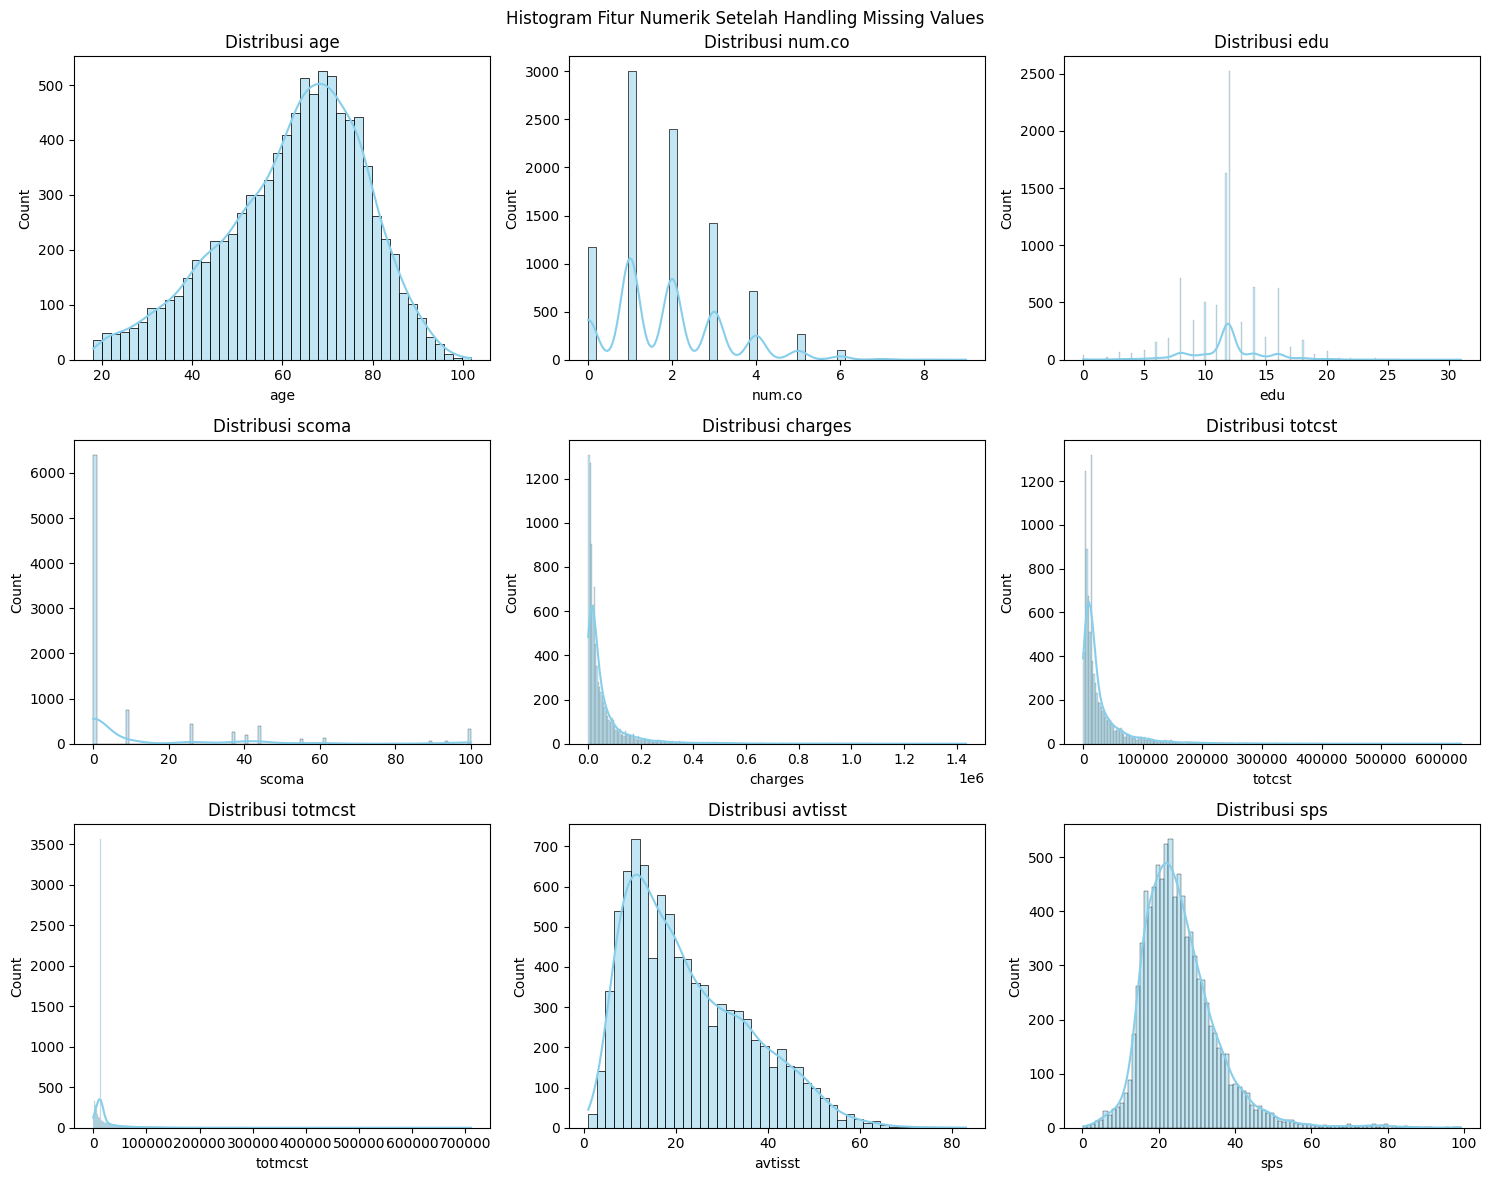

In [39]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))
fig.suptitle("Histogram Fitur Numerik Setelah Handling Missing Values")
num_cols_subset = num_cols[:9]  # Ambil 9 fitur pertama untuk visualisasi

for i, col in enumerate(num_cols_subset):
    sns.histplot(df[col], kde=True, ax=axes[i // 3, i % 3], color='skyblue')
    axes[i // 3, i % 3].set_title(f"Distribusi {col}")

plt.tight_layout()
plt.show()

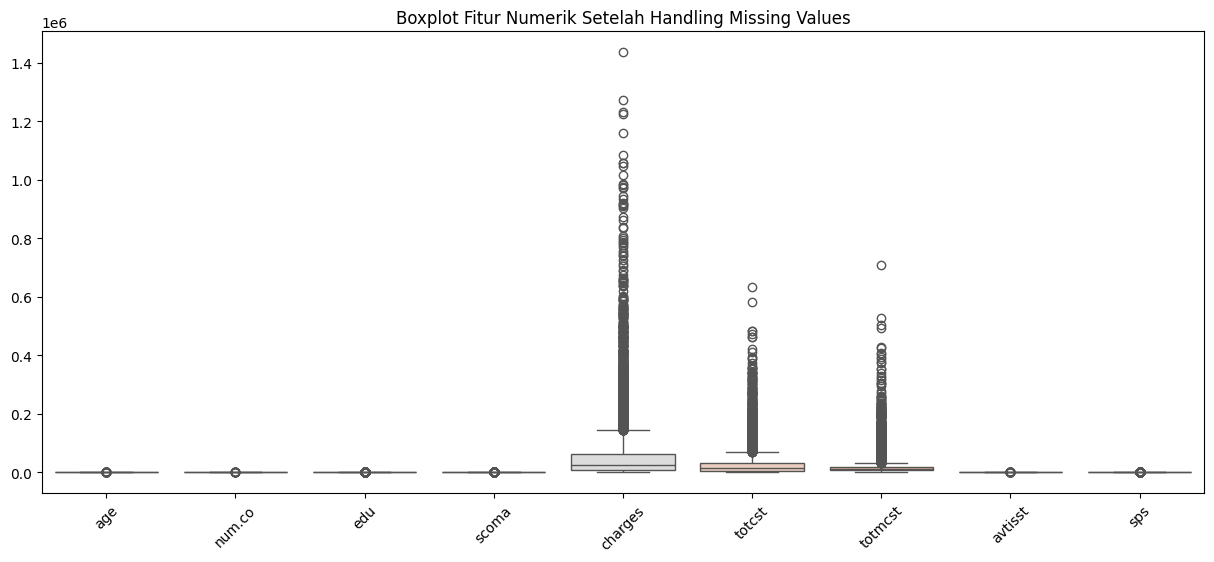

In [40]:
# Visualisasi Boxplot untuk melihat distribusi setelah missing values ditangani
plt.figure(figsize=(15, 6))
sns.boxplot(data=df[num_cols_subset], palette="coolwarm")
plt.xticks(rotation=45)
plt.title("Boxplot Fitur Numerik Setelah Handling Missing Values")
plt.show()

/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


Jumlah Outliers Sebelum Handling:
age           56
num.co        25
edu         3633
scoma       1955
charges      935
totcst       911
totmcst     1420
avtisst       48
sps          283
aps          178
surv2m       307
surv6m         0
hday        1543
diabetes    1778
dementia     296
prg2m        444
prg6m          0
dnrday       799
meanbp         6
wblc         431
hrt           40
resp         313
temp          14
pafi         476
alb         2202
bili        1397
crea         987
sod          256
ph          1107
glucose     4323
bun         3838
urine       4241
adlp        1615
adls        1630
adlsc          0
death          0
dtype: int64


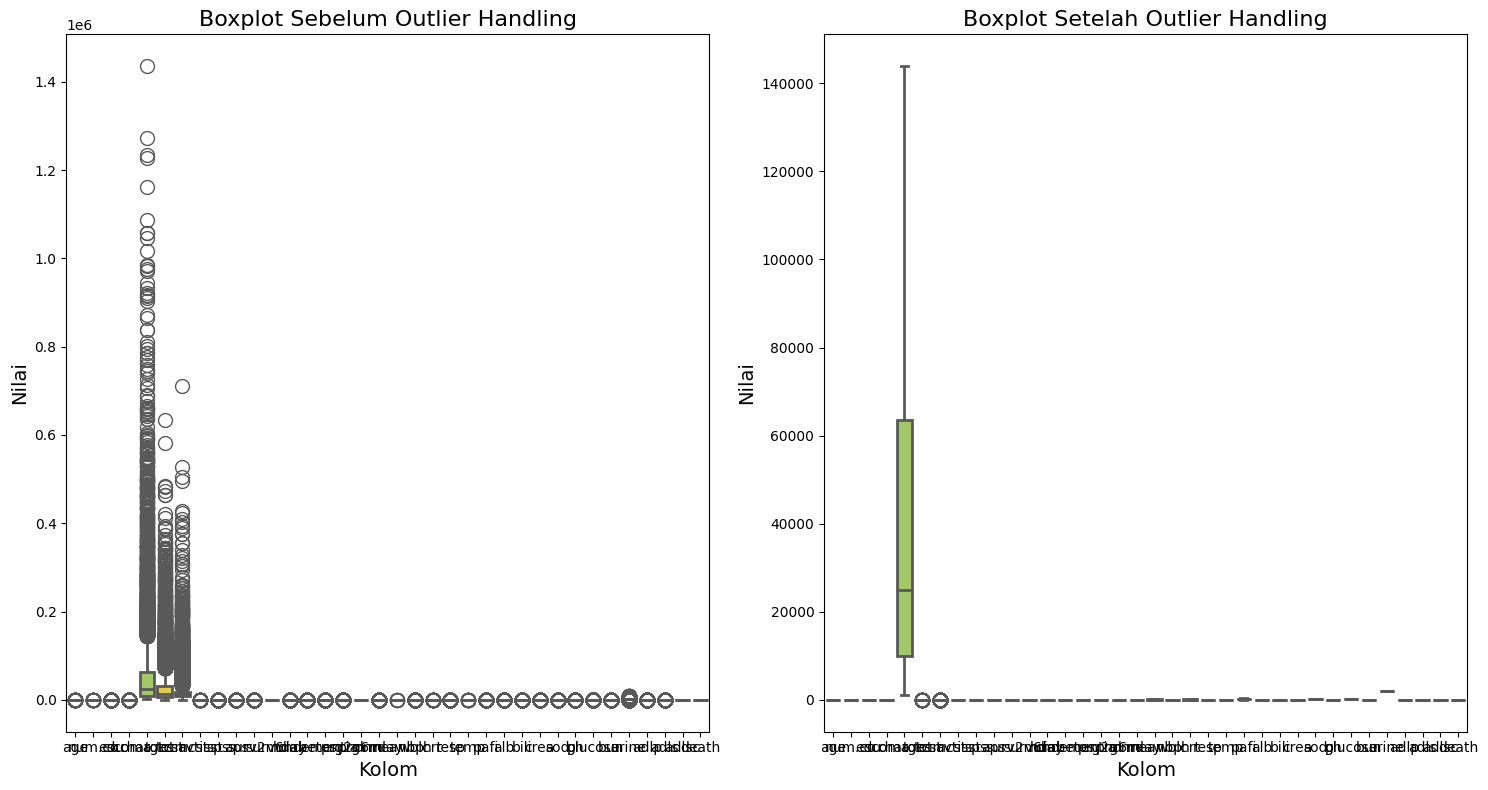

In [46]:
df_out = df.copy()

num_cols = df_out.select_dtypes(include=[np.number]).columns

Q1 = df_out[num_cols].quantile(0.25)
Q3 = df_out[num_cols].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

for col in num_cols:
    if col not in ["totcst", "totmcst"]:
        df_out[col] = df_out[col].clip(lower=lower_bound[col], upper=upper_bound[col])

df_out["totcst"] = np.log1p(df_out["totcst"])
df_out["totmcst"] = np.log1p(df_out["totmcst"])

outliers = ((df[num_cols] < lower_bound) | (df[num_cols] > upper_bound))
print("Jumlah Outliers Sebelum Handling:")
print(outliers.sum())

plt.figure(figsize=(15, 8))

# Boxplot sebelum Winsorizing
plt.subplot(1, 2, 1)
sns.boxplot(data=df[num_cols], palette="Set2", fliersize=10, linewidth=2)
plt.title("Boxplot Sebelum Outlier Handling", fontsize=16)
plt.xlabel("Kolom", fontsize=14)
plt.ylabel("Nilai", fontsize=14)

# Boxplot setelah Winsorizing dan Log Transform
plt.subplot(1, 2, 2)
sns.boxplot(data=df_out[num_cols], palette="Set2", fliersize=10, linewidth=2)
plt.title("Boxplot Setelah Outlier Handling", fontsize=16)
plt.xlabel("Kolom", fontsize=14)
plt.ylabel("Nilai", fontsize=14)

plt.tight_layout()
plt.show()


<ipython-input-62-c4cde628314a>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['income'].fillna(df['income'].mode()[0], inplace=True)
<ipython-input-62-c4cde628314a>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)',

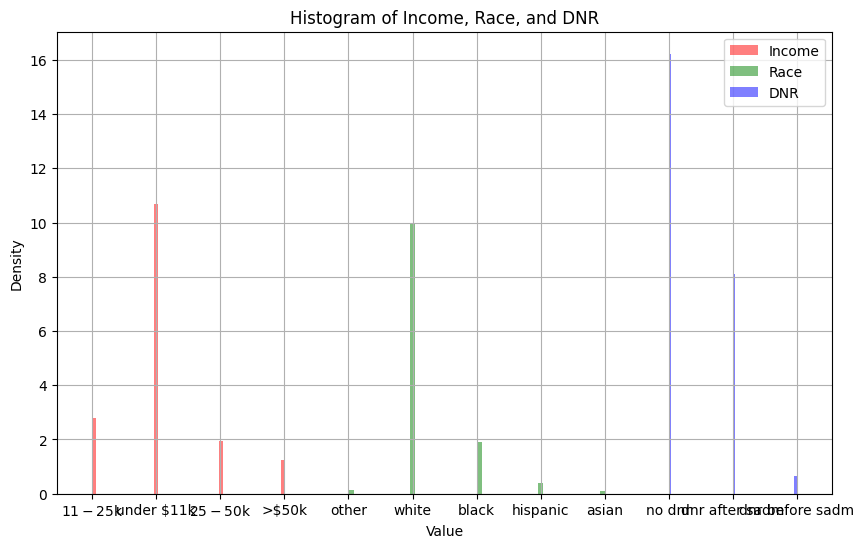

In [62]:
import matplotlib.pyplot as plt

df['income'].fillna(df['income'].mode()[0], inplace=True)
df['race'].fillna(df['race'].mode()[0], inplace=True)
df['dnr'].fillna(df['dnr'].mode()[0], inplace=True)

fig, ax = plt.subplots(figsize=(10, 6))

df['income'].hist(bins=50, ax=ax, density=True, color='red', alpha=0.5, label='Income')
df['race'].hist(bins=50, ax=ax, density=True, color='green', alpha=0.5, label='Race')
df['dnr'].hist(bins=50, ax=ax, density=True, color='blue', alpha=0.5, label='DNR')

ax.legend()
ax.set_xlabel('Value')
ax.set_ylabel('Density')
ax.set_title('Histogram of Income, Race, and DNR')

plt.show()

### Data Reduction: Menghapus kolom yang tidak relevan

In [47]:
drop_cols = ['id','hospdead','sfdm2','slos','d.time']
df.drop(columns=[col for col in drop_cols if col in df.columns], inplace=True)

### MODEL

In [48]:
from sklearn.decomposition import PCA
X = df.drop(columns=['death'])  # Fitur
y = df['death']  # Target klasifikasi

categorical_cols = X.select_dtypes(include=['object', 'category']).columns
print("Kolom Kategorikal:", categorical_cols)

label_encoder = LabelEncoder()
for col in categorical_cols:
    X[col] = label_encoder.fit_transform(X[col])

scalar = StandardScaler()
x_scaled= scalar.fit_transform(X.select_dtypes(include=[np.number]))

Kolom Kategorikal: Index(['sex', 'dzgroup', 'dzclass', 'income', 'race', 'ca', 'dnr'], dtype='object')


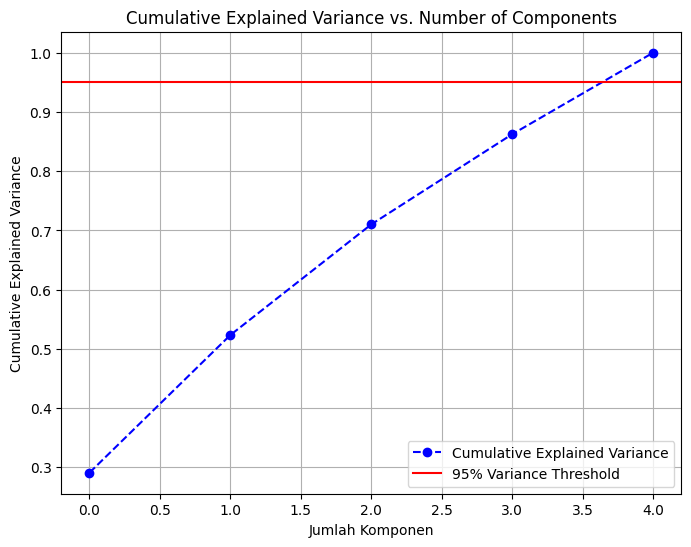

Jumlah komponen optimal untuk mencapai 95% variansi: 5


In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from scipy.stats.mstats import winsorize
from sklearn.preprocessing import StandardScaler

np.random.seed(42)
data = np.random.rand(100, 5)
X = pd.DataFrame(data, columns=[f'Feature_{i}' for i in range(1, 6)])

X_winsorized = X.apply(lambda col: winsorize(col, limits=[0.05, 0.05]))

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_winsorized)

pca = PCA(n_components=X_scaled.shape[1])
pca.fit(X_scaled)

explained_variance = pca.explained_variance_ratio_

plt.figure(figsize=(8,6))
plt.plot(np.cumsum(explained_variance), marker='o', linestyle='--', color='b', label='Cumulative Explained Variance')
plt.axhline(y=0.95, color='r', linestyle='-', label="95% Variance Threshold")
plt.title('Cumulative Explained Variance vs. Number of Components')
plt.xlabel('Jumlah Komponen')
plt.ylabel('Cumulative Explained Variance')
plt.legend()
plt.grid(True)
plt.show()

cumulative_variance = np.cumsum(explained_variance)
optimal_components = np.argmax(cumulative_variance >= 0.95) + 1
print(f"Jumlah komponen optimal untuk mencapai 95% variansi: {optimal_components}")


In [54]:
pca = PCA(n_components=24)
X_pca = pca.fit_transform(x_scaled)

X_train, X_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=0)

param_grid = {'n_neighbors': np.arange(1, 20), 'weights': ['uniform', 'distance'], 'metric': ['euclidean', 'manhattan']}
knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

best_knn = grid_search.best_estimator_
best_knn.fit(X_train, y_train)
y_train_pred = best_knn.predict(X_train)


train_accuracy = accuracy_score(y_train, y_train_pred)

print(f"🔹 Accuracy on Training Data: {train_accuracy:.4f}")

y_pred = best_knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"🔹 Best K: {grid_search.best_params_}")
print(f"🔹 Accuracy on Test Data: {accuracy:.4f}")
print("🔹 Classification Report: \n", classification_report(y_test, y_pred))


🔹 Accuracy on Training Data: 1.0000
🔹 Best K: {'metric': 'manhattan', 'n_neighbors': 19, 'weights': 'distance'}
🔹 Accuracy on Test Data: 0.7814
🔹 Classification Report: 
               precision    recall  f1-score   support

           0       0.65      0.55      0.60       537
           1       0.82      0.88      0.85      1284

    accuracy                           0.78      1821
   macro avg       0.74      0.72      0.72      1821
weighted avg       0.77      0.78      0.78      1821



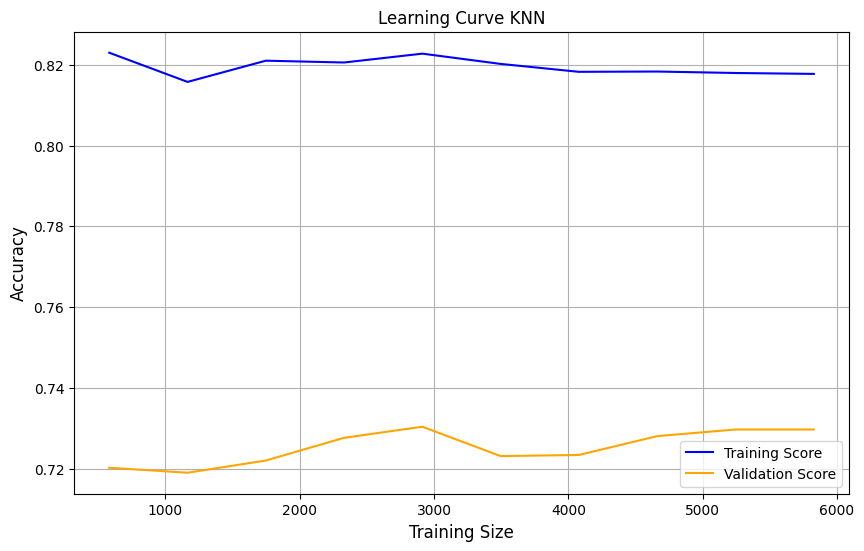

In [61]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(knn, X_train, y_train, cv=5, train_sizes=np.linspace(0.1, 1.0, 10))

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label="Training Score", color='blue')
plt.plot(train_sizes, test_mean, label="Validation Score", color='orange')
plt.xlabel("Training Size", fontsize=12)
plt.ylabel("Accuracy", fontsize=12)
plt.title("Learning Curve KNN")
plt.legend()
plt.grid(True)
plt.show()
